In [ ]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    "timbrooks/instruct-pix2pix", 
    torch_dtype=torch.float32,
    safety_checker=None)
pipe.to(device)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

url = "https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg"
def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image


: 

  0%|          | 0/10 [00:00<?, ?it/s]

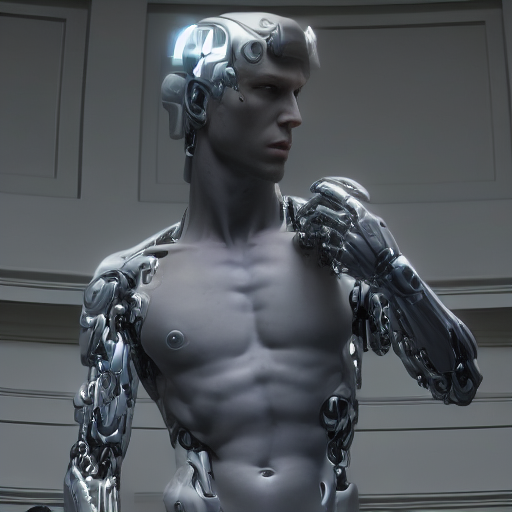

In [2]:
image = download_image(url)

prompt = "turn him into cyborg"
images = pipe(prompt, image=image, num_inference_steps=10, image_guidance_scale=1).images
images[0]

In [11]:
images[0].save("/home/nyanmaruk/Uni/Sofware-Engineering-Final_Project/Generate_images/timbrooks/instruct-pix2pix/i2t.jpg")